# Deep Learning Lab 
## Experiment 2: Design a neural network for diabetes prediction using keras library and pima Indian Diabetes Dataset.

### By Shubharthak, 20BCS6872

In [7]:
#Required Libraries and functions
import numpy as np 
import tensorflow as tf
import pandas as pd 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.random import set_seed
from helper_functions import plot_loss_curves
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

In [9]:
#Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [26]:
tf.random.set_seed(42)

#1. Create a model 
model = Sequential([
    Dense(units=12, input_dim=8, activation='relu'),
    Dense(units=8, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

#2. Compile the model 
model.compile(loss=BinaryCrossentropy(),
             optimizer=Adam(),
             metrics=['accuracy'])

#3. Fit the model 
history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
17/17 [==============================] - 1s 2ms/step - loss: 3.4401 - accuracy: 0.5400
Epoch 2/30
17/17 [==============================] - 0s 1ms/step - loss: 1.9682 - accuracy: 0.5345
Epoch 3/30
17/17 [==============================] - 0s 1ms/step - loss: 1.6158 - accuracy: 0.6350
Epoch 4/30
17/17 [==============================] - 0s 2ms/step - loss: 1.3167 - accuracy: 0.6331
Epoch 5/30
17/17 [==============================] - 0s 2ms/step - loss: 1.0587 - accuracy: 0.6425
Epoch 6/30
17/17 [==============================] - 0s 2ms/step - loss: 1.0149 - accuracy: 0.6369
Epoch 7/30
17/17 [==============================] - 0s 1ms/step - loss: 0.9165 - accuracy: 0.6238
Epoch 8/30
17/17 [==============================] - 0s 2ms/step - loss: 0.8664 - accuracy: 0.6518
Epoch 9/30
17/17 [==============================] - 0s 2ms/step - loss: 0.7815 - accuracy: 0.6778
Epoch 10/30
17/17 [==============================] - 0s 2ms/step - loss: 0.7499 - accuracy: 0.6853
Epoch 11/30
17/17 [

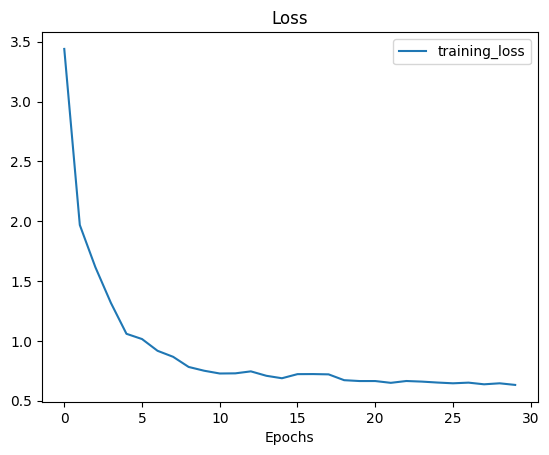

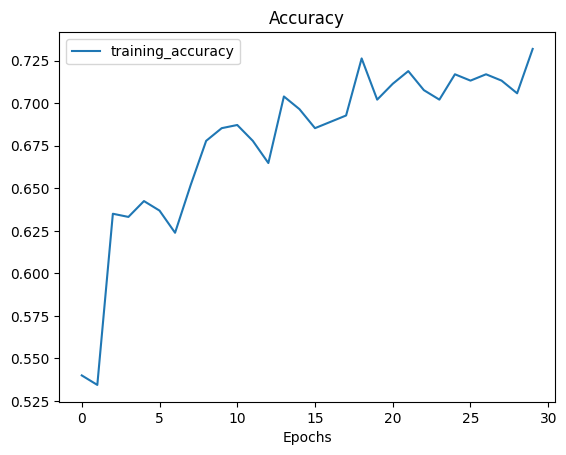

In [27]:
plot_loss_curves(history, 2)

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                108       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [18]:
scores = model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.7305 - accuracy: 0.6537


In [31]:
print(f'Accuracy: {scores[1] * 100:.2f}%')

Accuracy: 65.37%
